In [146]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [147]:
#new_store = pd.read_hdf("singlepi_e100GeV_pu200Nov7.h5")
prev_store = pd.read_hdf("singlepi_e100GeV_pu200_oct27.h5")
df = prev_store.drop(['trckType'],1,inplace=False)

In [7]:
# load the old data of october 27 to use it as test data. 
#prev_store['purity']=prev_store['purity'].apply(lambda x: 0 if x <=1 else 1 )
#XOct27Test = prev_store.drop(['purity','event','trackster','trckType'],1,inplace=False)
#YOct27Test = prev_store[['purity']].iloc[:,0]
#df = new_store.drop(['trckType'],1,inplace=False)
#df['purity']=df['purity'].apply(lambda x: 0 if x <=1 else 1 )

In [148]:
corr1= df.corr()
corr1.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi
event,1,0.04,0.0085,0.0049,0.013,0.048,0.37,-0.16,0.36,0.011,0.012,-0.12,0.037,0.4
trackster,0.04,1,0.051,-0.11,-0.0042,-0.058,-0.065,-0.068,-0.064,-0.087,0.026,-0.54,-0.021,-0.078
purity,0.0085,0.051,1,0.56,0.35,-0.29,0.0083,0.47,0.011,0.52,0.35,-0.1,-0.17,-0.013
layer,0.0049,-0.11,0.56,1,0.28,0.016,0.015,0.39,0.017,0.92,0.13,0.12,-0.023,0.011
E,0.013,-0.0042,0.35,0.28,1,-0.088,0.021,0.19,0.025,0.27,0.68,0.012,-0.065,0.016
eta,0.048,-0.058,-0.29,0.016,-0.088,1,0.015,-0.81,0.014,-0.028,-0.067,0.31,0.53,0.056
phi,0.37,-0.065,0.0083,0.015,0.021,0.015,1,-0.12,0.99,0.0039,0.019,-0.0046,0.049,0.95
x,-0.16,-0.068,0.47,0.39,0.19,-0.81,-0.12,1,-0.12,0.46,0.1,-0.11,-0.5,-0.15
y,0.36,-0.064,0.011,0.017,0.025,0.014,0.99,-0.12,1,0.0028,0.022,-0.003,0.05,0.94
z,0.011,-0.087,0.52,0.92,0.27,-0.028,0.0039,0.46,0.0028,1,0.11,0.092,-0.062,-0.0018


In [149]:
# drop highly correlated values
clean_df = df.drop(['x','y','z','trckPhi','trckEn','trckEta'],1,inplace=False)

C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


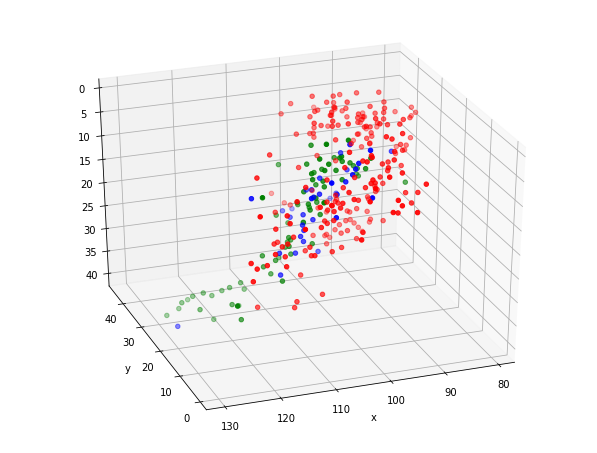

In [55]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df[df.event == 1][df.trackster==0.0][df.purity == 2]['x'],df[df.event == 1][df.trackster==0.0][df.purity == 2]['y'], df[df.event == 1][df.trackster==0.0][df.purity == 2]['layer'], c='G')
ax.scatter(df[df.event == 1][df.trackster==0.0][df.purity == 0]['x'],df[df.event == 1][df.trackster==0.0][df.purity == 0]['y'], df[df.event == 1][df.trackster==0.0][df.purity == 0]['layer'], c='R')
ax.scatter(df[df.event == 1][df.trackster==0.0][df.purity == 1]['x'],df[df.event == 1][df.trackster==0.0][df.purity == 1]['y'], df[df.event == 1][df.trackster==0.0][df.purity == 1]['layer'], c='B')
py.xlabel("x")
py.ylabel("y")
#zlanel phi
#py.title("all events, layer1, non pileup")
py.show()

C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


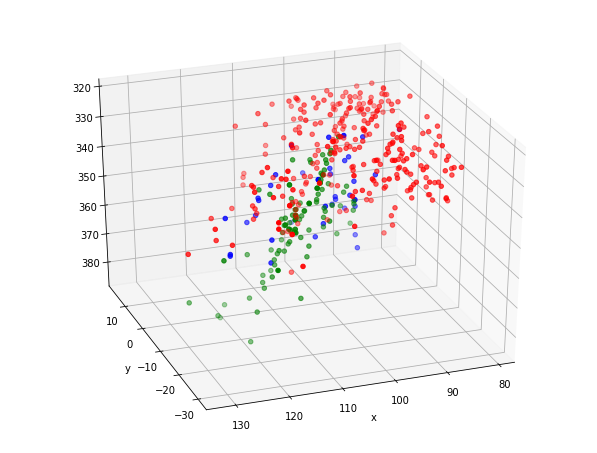

In [61]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df[df.event == 3][df.purity == 2]['x'],df[df.event == 3][df.purity == 2]['y'], df[df.event == 3][df.purity == 2]['z'], c='G')
ax.scatter(df[df.event == 3][df.purity == 0]['x'],df[df.event == 3][df.purity == 0]['y'], df[df.event == 3][df.purity == 0]['z'], c='R')
ax.scatter(df[df.event == 3][df.purity == 1]['x'],df[df.event == 3][df.purity == 1]['y'], df[df.event == 3][df.purity == 1]['z'], c='B')
py.xlabel("x")
py.ylabel("y")
#zlanel phi
#py.title("all events, layer1, non pileup")
py.show()

In [150]:
trainDF=clean_df.sample(frac=0.85,random_state=200) #random state is a seed value
testDF=clean_df.drop(trainDF.index)

x0Train = trainDF.drop(['purity','event','trackster'],1,inplace=False)
x0Test = testDF.drop(['purity','event','trackster'],1,inplace=False)

sc = StandardScaler()
x0Train = sc.fit_transform(x0Train)
x0Test = sc.transform(x0Test)

y0Train = trainDF[['purity']].iloc[:,0]
y0Test =  testDF[['purity']].iloc[:,0]

In [152]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50), random_state=1234).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3455   14  114]
 [ 194    8  104]
 [ 142    6  804]]
Test accuracy
0.8814294567238173
Test F1 score
0.5998566903313856


In [154]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 100), random_state=1234).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3459    2  122]
 [ 200    5  101]
 [ 147    0  805]]
Test accuracy
0.8818425945052675
Test F1 score
0.5937789308551996


In [153]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50), random_state=1234).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3496    1   86]
 [ 210    1   95]
 [ 173    0  779]]
Test accuracy
0.8832885767403429
Test F1 score
0.5861204227619168


In [155]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(30, 30, 30), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3487    5   91]
 [ 203    7   96]
 [ 166    1  785]]
Test accuracy
0.883908283412518
Test F1 score
0.5991290205589496


In [156]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(30, 30), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3482    4   97]
 [ 213    3   90]
 [ 176    4  772]]
Test accuracy
0.8793637678165668
Test F1 score
0.587048292766634


# extend featuers by including ratios to previous and next layers. 

In [161]:
extended_df_groupby_avg=df.groupby(['event','trackster','layer']).mean().reset_index()
extended_df_groupby_max=df.groupby(['event','trackster','layer']).max().reset_index()
extended_df_groupby_min=df.groupby(['event','trackster','layer']).min().reset_index()
extended_df_groupby_sum=df.groupby(['event','trackster','layer']).sum().reset_index()



In [162]:
def getValueEventLayerTrackster(df, col, event, trackster,layer, defaultV = 0):
    s = df.loc[(df['event'] == event) & (df['layer']==layer) & (df['trackster'] ==trackster) ,col ]
    return defaultV if s.size == 0 else s.values[0]



In [163]:
extended_df = df.copy()

extended_df['RatioSiblingNHits'] = extended_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(extended_df_groupby_max, 'nHits', row['event'], row['trackster'], row['layer'] ), axis=1)
extended_df['RatioNextNHits'] = extended_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(extended_df_groupby_max, 'nHits', row['event'], row['trackster'], row['layer'] + 1, 1 ), axis=1)
extended_df['RatioPrevNHits'] = extended_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(extended_df_groupby_max, 'nHits', row['event'], row['trackster'], row['layer'] - 1, 1 ), axis=1)

extended_df['RatioSiblingE'] = extended_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(extended_df_groupby_max, 'E', row['event'], row['trackster'], row['layer']), axis=1)
extended_df['RatioNextE'] = extended_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(extended_df_groupby_max, 'E', row['event'], row['trackster'], row['layer'] + 1,row['trckEn']), axis=1)
extended_df['RatioPrevE'] =  extended_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(extended_df_groupby_max, 'E', row['event'], row['trackster'], row['layer'] - 1, row['trckEn']), axis=1)

extended_df.head()

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi,RatioSiblingNHits,RatioNextNHits,RatioPrevNHits,RatioSiblingE,RatioNextE,RatioPrevE
0,1.0,0.0,0.0,1.0,0.077115,1.963233,0.158004,91.118462,14.518062,322.102753,5.0,57.759506,1.897144,0.196742,0.714286,1.0,5.0,0.571429,0.290335,0.001335
1,1.0,0.0,0.0,1.0,0.134952,1.931620,0.233432,92.770134,22.057596,322.102753,7.0,57.759506,1.897144,0.196742,1.000000,1.4,7.0,1.000000,0.508087,0.002336
2,1.0,0.0,0.0,1.0,0.081363,1.932140,0.148012,94.262695,14.054753,322.102753,2.0,57.759506,1.897144,0.196742,0.285714,0.4,2.0,0.602906,0.306328,0.001409
3,1.0,0.0,0.0,1.0,0.023200,1.950308,0.361422,87.475647,33.068218,322.102753,2.0,57.759506,1.897144,0.196742,0.285714,0.4,2.0,0.171913,0.087347,0.000402
4,1.0,0.0,0.0,1.0,0.088878,1.911650,0.356526,91.242096,33.982418,322.102753,2.0,57.759506,1.897144,0.196742,0.285714,0.4,2.0,0.658596,0.334624,0.001539


In [164]:
clean_extended_df = extended_df.drop(['x','y','z','trckPhi','trckEn','trckEta'],1,inplace=False)
trainDF=clean_extended_df.sample(frac=0.85,random_state=200) #random state is a seed value
testDF=clean_extended_df.drop(trainDF.index)

x0Train = trainDF.drop(['purity','event','trackster'],1,inplace=False)
x0Test = testDF.drop(['purity','event','trackster'],1,inplace=False)

sc = StandardScaler()
x0Train = sc.fit_transform(x0Train)
x0Test = sc.transform(x0Test)

y0Train = trainDF[['purity']].iloc[:,0]
y0Test =  testDF[['purity']].iloc[:,0]

In [165]:
trainDF.head()


,event,trackster,purity,layer,E,eta,phi,nHits,RatioSiblingNHits,RatioNextNHits,RatioPrevNHits,RatioSiblingE,RatioNextE,RatioPrevE
30596,98.0,0.0,0.0,2.0,0.315836,1.866235,0.541904,4.0,0.222222,0.571429,0.571429,0.538541,0.650932,1.751032
18615,58.0,0.0,2.0,35.0,0.956476,1.887522,0.354538,10.0,1.000000,2.500000,0.400000,0.742857,4.712500,0.140084
232,1.0,0.0,0.0,20.0,0.048622,1.824571,0.043409,3.0,0.333333,0.428571,0.250000,0.109009,0.056188,0.035118
21805,67.0,0.0,2.0,36.0,4.449390,1.887299,-0.410035,17.0,1.000000,0.531250,0.629630,1.000000,0.934461,0.547705
12222,41.0,0.0,0.0,7.0,0.026521,1.841026,-0.363915,2.0,0.285714,0.285714,0.142857,0.049755,0.083439,0.022189


In [166]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50, 50), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3407   50  126]
 [ 184   27   95]
 [ 137   26  789]]
Test accuracy
0.8723404255319149
Test F1 score
0.622776976295932


In [167]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(25, 25, 25, 25), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3436   37  110]
 [ 187   22   97]
 [ 151    3  798]]
Test accuracy
0.8791571989258418
Test F1 score
0.6230585292688803


In [168]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3404   34  145]
 [ 168   24  114]
 [ 141   23  788]]
Test accuracy
0.8708944432968395
Test F1 score
0.6151797466460689


In [169]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3417   26  140]
 [ 187   16  103]
 [ 148   10  794]]
Test accuracy
0.8731667010948151
Test F1 score
0.6064913225686518


In [171]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(75, 75), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3464   16  103]
 [ 205    7   94]
 [ 176   10  766]]
Test accuracy
0.8752323900020657
Test F1 score
0.5913283549608196


# merge rations of Next/Previous into one (Adjacent)

In [172]:
extended_df1 = df.copy()

extended_df1['RatioSiblingNHits'] = extended_df1.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(extended_df_groupby_avg, 'nHits', row['event'], row['trackster'], row['layer'] ), axis=1)
extended_df1['RatioAdjcentNHits'] = extended_df1.apply(lambda row: row['nHits'] / ((getValueEventLayerTrackster(extended_df_groupby_avg, 'nHits', row['event'], row['trackster'], row['layer'] + 1, row['nHits']) +  getValueEventLayerTrackster(extended_df_groupby_avg, 'nHits', row['event'], row['trackster'], row['layer'] - 1, row['nHits'] )) /2), axis=1)
#extended_df1['RatioPrevNHits'] = extended_df1.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(extended_df_groupby_avg, 'nHits', row['event'], row['trackster'], row['layer'] - 1, 1 ), axis=1)

extended_df1['RatioSiblingE'] = extended_df1.apply(lambda row: row['E'] / getValueEventLayerTrackster(extended_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer']), axis=1)
extended_df1['RatioAdjacentE'] = extended_df1.apply(lambda row: row['E'] / ((getValueEventLayerTrackster(extended_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] + 1,row['E'] ) + getValueEventLayerTrackster(extended_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] - 1,row['E'] ))/2), axis=1)
#extended_df1['RatioPrevE'] =  extended_df1.apply(lambda row: row['E'] / getValueEventLayerTrackster(extended_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] - 1, row['trckEn']), axis=1)

extended_df1.head()

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi,RatioSiblingNHits,RatioAdjcentNHits,RatioSiblingE,RatioAdjacentE
0,1.0,0.0,0.0,1.0,0.077115,1.963233,0.158004,91.118462,14.518062,322.102753,5.0,57.759506,1.897144,0.196742,1.607143,1.284404,1.197970,0.821293
1,1.0,0.0,0.0,1.0,0.134952,1.931620,0.233432,92.770134,22.057596,322.102753,7.0,57.759506,1.897144,0.196742,2.250000,1.430657,2.096447,1.098837
2,1.0,0.0,0.0,1.0,0.081363,1.932140,0.148012,94.262695,14.054753,322.102753,2.0,57.759506,1.897144,0.196742,0.642857,0.835821,1.263959,0.847366
3,1.0,0.0,0.0,1.0,0.023200,1.950308,0.361422,87.475647,33.068218,322.102753,2.0,57.759506,1.897144,0.196742,0.642857,0.835821,0.360406,0.346592
4,1.0,0.0,0.0,1.0,0.088878,1.911650,0.356526,91.242096,33.982418,322.102753,2.0,57.759506,1.897144,0.196742,0.642857,0.835821,1.380711,0.890776


In [173]:
clean_extended_df1 = extended_df1.drop(['x','y','z','trckPhi','trckEn','trckEta'],1,inplace=False)
trainDF=clean_extended_df1.sample(frac=0.85,random_state=200) #random state is a seed value
testDF=clean_extended_df1.drop(trainDF.index)

x0Train = trainDF.drop(['purity','event','trackster'],1,inplace=False)
x0Test = testDF.drop(['purity','event','trackster'],1,inplace=False)

sc = StandardScaler()
x0Train = sc.fit_transform(x0Train)
x0Test = sc.transform(x0Test)

y0Train = trainDF[['purity']].iloc[:,0]
y0Test =  testDF[['purity']].iloc[:,0]

In [174]:
clf0 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50), random_state=134, max_iter=500).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred,average='macro'))

Testing confusion_matrix
[[3442   15  126]
 [ 187   14  105]
 [ 142    5  805]]
Test accuracy
0.880190043379467
Test F1 score
0.6094337664202646


### KERAS

In [175]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

In [176]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=x0Train.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
    return model

In [177]:
prev_store = pd.read_hdf("singlepi_e100GeV_pu200_oct27.h5")

df = prev_store.drop(['trckType'],1,inplace=False)
clean_df = df.drop(['eta','phi','layer','trckPhi','trckEn','trckEta'],1,inplace=False)
#clean_df = df.drop(['x','y','z'],1,inplace=False)

# Train and Test
trainDF=clean_df.sample(frac=0.85,random_state=200) #random state is a seed value
testDF=clean_df.drop(trainDF.index)

trainDF=df.sample(frac=0.85,random_state=200) #random state is a seed value
testDF=df.drop(trainDF.index)

x0Train = trainDF.drop(['purity','event','trackster'],1,inplace=False)
x0Test = testDF.drop(['purity','event','trackster'],1,inplace=False)

sc = StandardScaler()
X_train = sc.fit_transform(x0Train)
X_test = sc.transform(x0Test)

y_train = trainDF[['purity']].iloc[:,0]
y_test =  testDF[['purity']].iloc[:,0]

In [178]:

model = baseline_model()
model.fit(X_train, y_train,nb_epoch=200,batch_size=32)

pred2=model.predict_classes(X_test, batch_size=32, verbose=0)

print("Test accuracy")
print(accuracy_score(y_test, pred2))
print("Test F1 score")
print(f1_score(y_test, pred2,average='macro'))
print("Testing confusion_matrix")
print(confusion_matrix(y_test, pred2))

C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/200
27433/27433 [==============================] - 1s 33us/step - loss: 0.3967 - sparse_categorical_accuracy: 0.8585
Epoch 2/200
27433/27433 [==============================] - 1s 30us/step - loss: 0.3558 - sparse_categorical_accuracy: 0.8735
Epoch 3/200
27433/27433 [==============================] - 1s 28us/step - loss: 0.3433 - sparse_categorical_accuracy: 0.8758
Epoch 4/200
27433/27433 [==============================] - 1s 27us/step - loss: 0.3257 - sparse_categorical_accuracy: 0.8802
Epoch 5/200
27433/27433 [==============================] - 1s 27us/step - loss: 0.3122 - sparse_categorical_accuracy: 0.8841
Epoch 6/200
27433/27433 [==============================] - 1s 28us/step - loss: 0.3067 - sparse_categorical_accuracy: 0.8858
Epoch 7/200
27433/27433 [==============================] - 1s 28us/step - loss: 0.3016 - sparse_categorical_accuracy: 0.8865
Epoch 8/200
27433/27433 [==============================] - 1s 32us/step - loss: 0.2994 - sparse_categorical_accuracy: 0.8877
